### Analysing Covid19 Cases and Mortality Rate per-100000 Population VS Fully Vaccinated Rate per-100 Population, with combining two dataframes from WHO (World Health Organization) data:
WHO-COVID-19-global-table-data.csv

vaccination-data.csv

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import os
import warnings
import statsmodels.api as sm

#%matplotlib inline 
warnings.filterwarnings('ignore')

#### First we work on dataframe #1: WHO-COVID-19-global-table-data.csv
https://covid19.who.int/table?tableChartType=heat

### Show dataframe #1 

In [3]:
data_fileA = "WHO-COVID-19-global-table-data.csv"
dfA = pd.read_csv(data_fileA) 
dfA.rename(columns = {'Name':'COUNTRY'}, inplace = True)
dfA.rename(columns = {'WHO Region':'Region'}, inplace = True)
dfA.rename(columns = {'Cases - cumulative total per 100000 population':'Cases_cumulative_total_per_100000_pop'}, 
           inplace = True)
dfA.rename(columns = {'Deaths - cumulative total per 100000 population':'Deaths_cumulative_total_per_100000_pop'}, 
           inplace = True)
dfA.head(4)

,COUNTRY,Region,Cases - cumulative total,Cases_cumulative_total_per_100000_pop,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths_cumulative_total_per_100000_pop,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,Unnamed: 12
0,Global,World,404910528,5194.796734,17407683,223.331745,2473605,5783776,74.202913,73174,0.938785,12788,NaN
1,United States of America,Americas,76649746,23156.837000,1535102,463.773000,201679,905957,273.701000,17239,5.208000,3768,NaN
2,India,South-East Asia,42536137,3082.319000,583425,42.277000,58077,507177,36.752000,7122,0.516000,657,NaN
3,Brazil,Americas,26955434,12681.364000,1162322,546.822000,178814,635074,298.775000,6114,2.876000,1264,NaN


In [4]:
df1 = dfA[["COUNTRY",'Region','Cases_cumulative_total_per_100000_pop','Deaths_cumulative_total_per_100000_pop']]   
df1=df1.round(decimals = 0)
df1.tail(4)     

,COUNTRY,Region,Cases_cumulative_total_per_100000_pop,Deaths_cumulative_total_per_100000_pop
234,Saint Helena,Africa,0.0,0.0
235,Tokelau,Western Pacific,0.0,0.0
236,Turkmenistan,Europe,0.0,0.0
237,Tuvalu,Western Pacific,0.0,0.0


In [5]:
df1_Regions = df1["COUNTRY"].replace(to_replace =["occupied Palestinian territory including east Jerusalem"], 
                                     value ="Palestinian territory",inplace=True)

In [6]:
df1.count()

COUNTRY                                   238
Region                                    238
Cases_cumulative_total_per_100000_pop     237
Deaths_cumulative_total_per_100000_pop    237
dtype: int64

In [7]:
df1_Regions = df1["Region"].value_counts()
df1_Regions

Europe                   62
Americas                 56
Africa                   50
Western Pacific          35
Eastern Mediterranean    22
South-East Asia          11
World                     1
Other                     1
Name: Region, dtype: int64

In [8]:
df1_Regions = df1["Region"].value_counts()
df1_Regions

Europe                   62
Americas                 56
Africa                   50
Western Pacific          35
Eastern Mediterranean    22
South-East Asia          11
World                     1
Other                     1
Name: Region, dtype: int64

### Show empty values and Imputation for dataframe 1

In [9]:
print(df1.isnull().sum())

COUNTRY                                   0
Region                                    0
Cases_cumulative_total_per_100000_pop     1
Deaths_cumulative_total_per_100000_pop    1
dtype: int64


In [10]:
is_NaN = df1.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df1[row_has_NaN]

print(rows_with_NaN)

    COUNTRY Region  Cases_cumulative_total_per_100000_pop  \
216   Other  Other                                    NaN   

     Deaths_cumulative_total_per_100000_pop  
216                                     NaN  


In [11]:
#Delete meaningless row data
df1=df1.fillna(0)

In [12]:
print(df1.isnull().sum())

COUNTRY                                   0
Region                                    0
Cases_cumulative_total_per_100000_pop     0
Deaths_cumulative_total_per_100000_pop    0
dtype: int64


#### Now we move on to dataframe #2: vaccination-data.csv

### Show dataframe #2

In [13]:
data_fileB = "vaccination-data.csv"
dfB = pd.read_csv(data_fileB) 
dfB.rename(columns = {'PERSONS_FULLY_VACCINATED_PER100':'FULLY_VACCINATED_PER100'},inplace = True)
dfB.head(3) 

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,AFG,EMRO,REPORTING,2022-02-07,5216998,4634282.0,13.402,11.905,3959887.0,10.172,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2021-02-22,4.0
1,Albania,ALB,EURO,REPORTING,2022-01-30,2613974,1261272.0,90.800,44.318,1127431.0,40.377,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2021-01-13,5.0
2,Algeria,DZA,AFRO,REPORTING,2022-01-09,12974545,7247787.0,29.588,16.528,5796432.0,13.218,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-01-30,4.0


In [14]:
df2 = dfB[["COUNTRY",'FULLY_VACCINATED_PER100']]   
df2=df2.round(decimals = 0)
df2.tail(12) 

,COUNTRY,FULLY_VACCINATED_PER100
216,United Arab Emirates,NaN
217,United Republic of Tanzania,3.0
218,United States of America,63.0
219,Uruguay,78.0
220,Uzbekistan,37.0
221,Vanuatu,24.0
222,Venezuela (Bolivarian Republic of),50.0
223,Viet Nam,76.0
224,Wallis and Futuna,55.0
225,Yemen,1.0


### Show empty values and Imputation for dataframe 2


In [15]:
print(df2.isnull().sum())

COUNTRY                    0
FULLY_VACCINATED_PER100    3
dtype: int64


In [16]:
is_NaN = df2.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df2[row_has_NaN]

print(rows_with_NaN)

                  COUNTRY  FULLY_VACCINATED_PER100
86               Guernsey                      NaN
166                 Qatar                      NaN
216  United Arab Emirates                      NaN


# BUT...

#### United Arab Emirates Percentage of population fully vaccinated: 94.95 %
https://covid19.ncema.gov.ae/en/page/about-the-vaccine

#### In "Our World Data" Percentage of fully vaccinated population: 93.84 %
https://ourworldindata.org/covid-vaccinations:

United Arab Emirates : 93.84

Qatar: 77.0

Guernsey: 81.01

### So the Values can't be impute become null

In [17]:
df2["FULLY_VACCINATED_PER100"] = np.where(df2["COUNTRY"] == "United Arab Emirates",94,
                                         df2["FULLY_VACCINATED_PER100"].values)

In [18]:
df2UAE = df2[df2['COUNTRY'] == 'United Arab Emirates']
df2UAE.head()

,COUNTRY,FULLY_VACCINATED_PER100
216,United Arab Emirates,94.0


In [19]:
df2["FULLY_VACCINATED_PER100"] = np.where(df2["COUNTRY"] == "Qatar", 77,
                                          df2["FULLY_VACCINATED_PER100"].values)

In [20]:
df2Qatar = df2[df2['COUNTRY'] == 'Qatar']
df2Qatar.head()

,COUNTRY,FULLY_VACCINATED_PER100
166,Qatar,77.0


In [21]:
df2["FULLY_VACCINATED_PER100"] = np.where(df2["COUNTRY"] == "Guernsey", 81,
                                          df2["FULLY_VACCINATED_PER100"].values)

In [22]:
df2Guernsey = df2[df2['COUNTRY'] == 'Guernsey']
df2Guernsey.head()

,COUNTRY,FULLY_VACCINATED_PER100
86,Guernsey,81.0


In [23]:
df2.tail(12)

,COUNTRY,FULLY_VACCINATED_PER100
216,United Arab Emirates,94.0
217,United Republic of Tanzania,3.0
218,United States of America,63.0
219,Uruguay,78.0
220,Uzbekistan,37.0
221,Vanuatu,24.0
222,Venezuela (Bolivarian Republic of),50.0
223,Viet Nam,76.0
224,Wallis and Futuna,55.0
225,Yemen,1.0


### Combine two dataframes become one 

In [24]:
df = pd.merge(df1,df2, on=["COUNTRY", "COUNTRY"])
df.head(5)

,COUNTRY,Region,Cases_cumulative_total_per_100000_pop,Deaths_cumulative_total_per_100000_pop,FULLY_VACCINATED_PER100
0,United States of America,Americas,23157.0,274.0,63.0
1,India,South-East Asia,3082.0,37.0,52.0
2,Brazil,Americas,12681.0,299.0,71.0
3,France,Europe,31938.0,202.0,77.0
4,The United Kingdom,Europe,26754.0,234.0,71.0


In [25]:
df.shape

(225, 5)

In [26]:
df.sort_values(by=['FULLY_VACCINATED_PER100'], inplace=True, ascending=False)
df.head(5)

,COUNTRY,Region,Cases_cumulative_total_per_100000_pop,Deaths_cumulative_total_per_100000_pop,FULLY_VACCINATED_PER100
173,Gibraltar,Europe,42053.0,300.0,121.0
59,United Arab Emirates,Eastern Mediterranean,8737.0,23.0,94.0
203,Palau,Western Pacific,16831.0,0.0,94.0
166,Brunei Darussalam,Western Pacific,4451.0,13.0,92.0
31,Chile,Americas,13100.0,211.0,89.0


In [27]:
df.tail(5)

,COUNTRY,Region,Cases_cumulative_total_per_100000_pop,Deaths_cumulative_total_per_100000_pop,FULLY_VACCINATED_PER100
157,Haiti,Americas,259.0,7.0,1.0
194,Chad,Africa,44.0,1.0,1.0
180,Yemen,Eastern Mediterranean,39.0,7.0,1.0
145,Burundi,Africa,318.0,0.0,0.0
122,Democratic Republic of the Congo,Africa,96.0,1.0,0.0


# Covariance and Correlation

In [28]:
df.corr()

,Cases_cumulative_total_per_100000_pop,Deaths_cumulative_total_per_100000_pop,FULLY_VACCINATED_PER100
Cases_cumulative_total_per_100000_pop,1.000000,0.575243,0.519948
Deaths_cumulative_total_per_100000_pop,0.575243,1.000000,0.249725
FULLY_VACCINATED_PER100,0.519948,0.249725,1.000000


In [29]:
df.describe().round(decimals = 0)

,Cases_cumulative_total_per_100000_pop,Deaths_cumulative_total_per_100000_pop,FULLY_VACCINATED_PER100
count,225.0,225.0,225.0
mean,10955.0,103.0,49.0
std,11653.0,114.0,27.0
min,0.0,0.0,0.0
25%,667.0,9.0,28.0
50%,7515.0,62.0,53.0
75%,17838.0,163.0,71.0
max,55254.0,629.0,121.0


In [30]:
df[['FULLY_VACCINATED_PER100','Cases_cumulative_total_per_100000_pop']].corr()

,FULLY_VACCINATED_PER100,Cases_cumulative_total_per_100000_pop
FULLY_VACCINATED_PER100,1.000000,0.519948
Cases_cumulative_total_per_100000_pop,0.519948,1.000000


In [31]:
df[['FULLY_VACCINATED_PER100','Deaths_cumulative_total_per_100000_pop']].corr()

,FULLY_VACCINATED_PER100,Deaths_cumulative_total_per_100000_pop
FULLY_VACCINATED_PER100,1.000000,0.249725
Deaths_cumulative_total_per_100000_pop,0.249725,1.000000


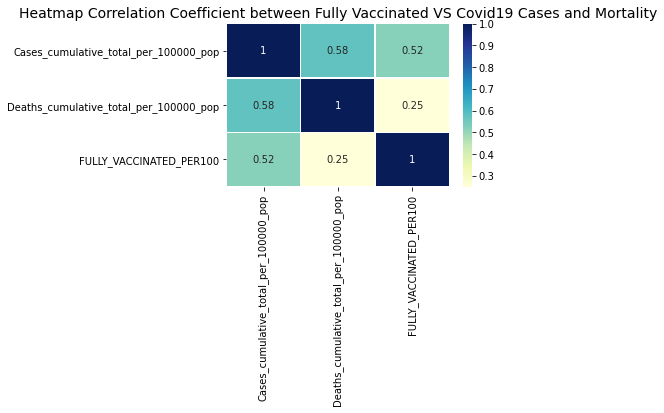

In [32]:
# generate heatmap of correlation coefficients 
plt.figure(figsize=(5, 3)) # create figure  

sns.heatmap(df.corr(),linewidths = .4,  cmap="YlGnBu", annot = True)  
plt.title("Heatmap Correlation Coefficient between Fully Vaccinated VS Covid19 Cases and Mortality", size = 14,)
plt.savefig("heatmap",transparent=False, bbox_inches='tight',pad_inches=0.1)
plt.show() # show figure  

Heatmap show correlation between the variables on each axis. Each square shows correlation ranges from -1 to +1. 
Values closer to zero means there is no correlation between two variables. The closer the value to 1, the more positivity correlated they are. The diagonals colors are dark, because they are correlating to itself and become perfect correlation. 

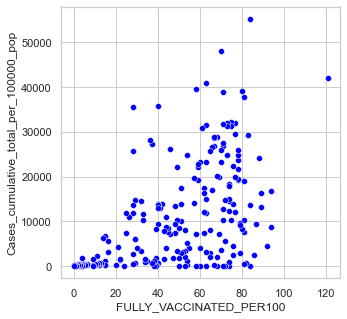

In [33]:
# %% plot the data in a simple scatter plot
plt.figure(figsize=(5, 5))
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df, x="FULLY_VACCINATED_PER100", y="Cases_cumulative_total_per_100000_pop",
               color = 'blue')
plt.savefig("FullyVaccinated_Cases",transparent=False, bbox_inches='tight',pad_inches=0.1)
plt.show()

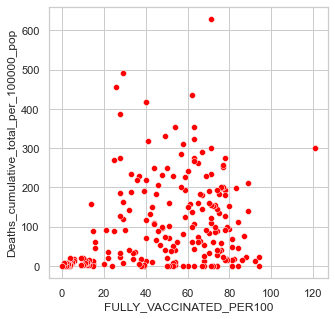

In [34]:
# %% plot the data in a simple scatter plot
plt.figure(figsize=(5, 5))
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df, x="FULLY_VACCINATED_PER100", y="Deaths_cumulative_total_per_100000_pop",
               color = 'red')
plt.savefig("FullyVaccinated_Deaths",transparent=False, bbox_inches='tight',pad_inches=0.1)
plt.show()

In [35]:
np.cov([df.FULLY_VACCINATED_PER100, df.Cases_cumulative_total_per_100000_pop])

array([[7.08474206e+02, 1.61274995e+05],
       [1.61274995e+05, 1.35796924e+08]])

In [39]:
np.cov([df.FULLY_VACCINATED_PER100, df.Deaths_cumulative_total_per_100000_pop])

array([[  708.47420635,   757.93948413],
       [  757.93948413, 13002.34789683]])

In [42]:
np.cov([df.Cases_cumulative_total_per_100000_pop, df.Deaths_cumulative_total_per_100000_pop])

array([[1.35796924e+08, 7.64376040e+05],
       [7.64376040e+05, 1.30023479e+04]])

### Divided by Region

In [44]:
df_Regions = df["Region"].value_counts()
df_Regions.head(7)

Europe                   60
Americas                 52
Africa                   47
Western Pacific          35
Eastern Mediterranean    21
South-East Asia          10
Name: Region, dtype: int64

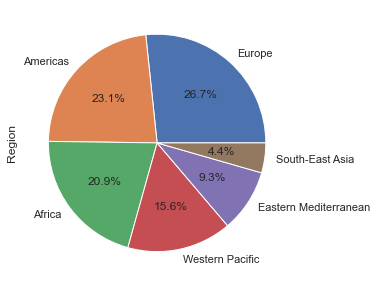

In [45]:
plot_regions=df_Regions.plot.pie(autopct='%1.1f%%', figsize=(5, 5))
plt.savefig("Piechart",transparent=False, bbox_inches='tight',pad_inches=0.1)

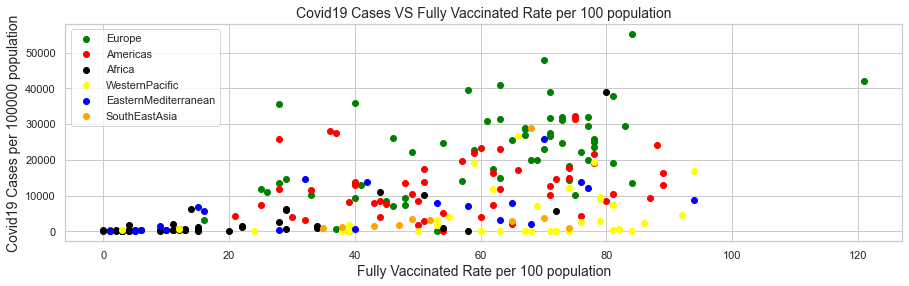

In [46]:
#create every Regions
dfEurope = df[df['Region'] == 'Europe']
dfAmericas = df[df['Region'] == 'Americas']
dfAfrica = df[df['Region'] == 'Africa']
dfWesternPacific = df[df['Region'] == 'Western Pacific']
dfEasternMediterranean = df[df['Region'] == 'Eastern Mediterranean']
dfSouthEastAsia = df[df['Region'] == 'South-East Asia']

#plot the three dataframes
plt.rcParams["figure.figsize"] = [15,4]
plt.scatter(dfEurope['FULLY_VACCINATED_PER100'], dfEurope['Cases_cumulative_total_per_100000_pop'], 
            color='green',label='Europe')
plt.scatter(dfAmericas['FULLY_VACCINATED_PER100'], dfAmericas['Cases_cumulative_total_per_100000_pop'], 
            color='red',label='Americas')
plt.scatter(dfAfrica['FULLY_VACCINATED_PER100'], dfAfrica['Cases_cumulative_total_per_100000_pop'], 
            color='black',label='Africa')
plt.scatter(dfWesternPacific['FULLY_VACCINATED_PER100'], dfWesternPacific['Cases_cumulative_total_per_100000_pop'], 
            color='yellow',label='WesternPacific')
plt.scatter(dfEasternMediterranean['FULLY_VACCINATED_PER100'], dfEasternMediterranean['Cases_cumulative_total_per_100000_pop'], 
            color='blue',label='EasternMediterranean')
plt.scatter(dfSouthEastAsia['FULLY_VACCINATED_PER100'], dfSouthEastAsia['Cases_cumulative_total_per_100000_pop'], 
            color='orange',label='SouthEastAsia')

#put label
plt.title("Covid19 Cases VS Fully Vaccinated Rate per 100 population", size=14)
plt.xlabel("Fully Vaccinated Rate per 100 population", size=14)
plt.ylabel("Covid19 Cases per 100000 population", size=14)
plt.legend()
plt.savefig("Regions_Vaccine_Cases",transparent=False, bbox_inches='tight',pad_inches=0.1)

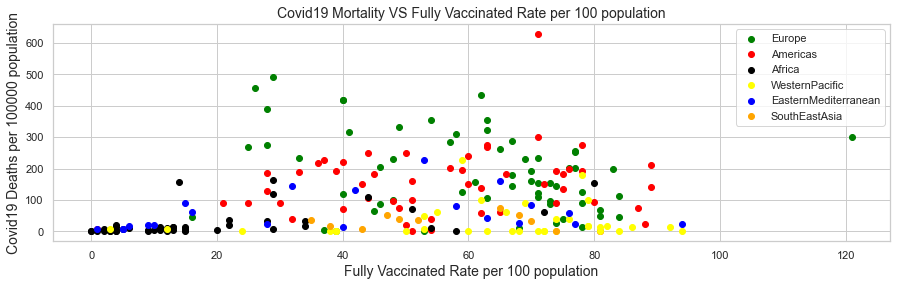

In [47]:
#create every Regions
dfEurope = df[df['Region'] == 'Europe']
dfAmericas = df[df['Region'] == 'Americas']
dfAfrica = df[df['Region'] == 'Africa']
dfWesternPacific = df[df['Region'] == 'Western Pacific']
dfEasternMediterranean = df[df['Region'] == 'Eastern Mediterranean']
dfSouthEastAsia = df[df['Region'] == 'South-East Asia']

#plot the three dataframes
plt.rcParams["figure.figsize"] = [15,4]
plt.scatter(dfEurope['FULLY_VACCINATED_PER100'], dfEurope['Deaths_cumulative_total_per_100000_pop'], 
            color='green',label='Europe')
plt.scatter(dfAmericas['FULLY_VACCINATED_PER100'], dfAmericas['Deaths_cumulative_total_per_100000_pop'], 
            color='red',label='Americas')
plt.scatter(dfAfrica['FULLY_VACCINATED_PER100'], dfAfrica['Deaths_cumulative_total_per_100000_pop'], 
            color='black',label='Africa')
plt.scatter(dfWesternPacific['FULLY_VACCINATED_PER100'], dfWesternPacific['Deaths_cumulative_total_per_100000_pop'], 
            color='yellow',label='WesternPacific')
plt.scatter(dfEasternMediterranean['FULLY_VACCINATED_PER100'], dfEasternMediterranean['Deaths_cumulative_total_per_100000_pop'], 
            color='blue',label='EasternMediterranean')
plt.scatter(dfSouthEastAsia['FULLY_VACCINATED_PER100'], dfSouthEastAsia['Deaths_cumulative_total_per_100000_pop'], 
            color='orange',label='SouthEastAsia')

#put label
plt.title("Covid19 Mortality VS Fully Vaccinated Rate per 100 population", size=14)
plt.xlabel("Fully Vaccinated Rate per 100 population", size=14)
plt.ylabel("Covid19 Deaths per 100000 population", size=14)
plt.legend()
plt.savefig("Regions_Vaccine_Death",transparent=False, bbox_inches='tight',pad_inches=0.1)

## Analysing Covid19 in SOUTH EAST ASIA

In [48]:
dfSouthEastAsia.head(4)

,COUNTRY,Region,Cases_cumulative_total_per_100000_pop,Deaths_cumulative_total_per_100000_pop,FULLY_VACCINATED_PER100
196,Bhutan,South-East Asia,903.0,1.0,74.0
28,Thailand,South-East Asia,3669.0,32.0,70.0
109,Maldives,South-East Asia,28844.0,53.0,68.0
70,Sri Lanka,South-East Asia,2917.0,73.0,65.0


### Fully Vaccinated Person per-100 population in South east Asia

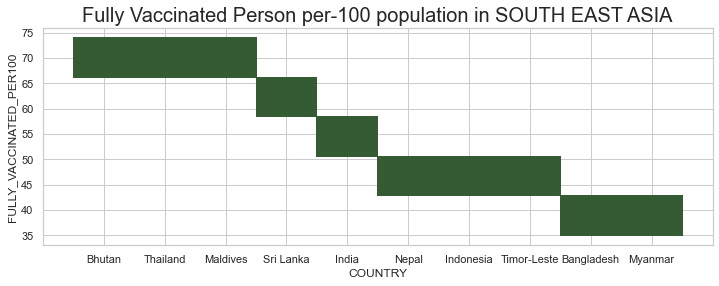

In [49]:
# box plot
plt.figure(figsize=(12, 4))
plt.title("Fully Vaccinated Person per-100 population in SOUTH EAST ASIA",size=20)
sns.histplot(x="COUNTRY", y="FULLY_VACCINATED_PER100", \
    data=dfSouthEastAsia,color='green')
plt.savefig("SEA_vaccinated_boxplot",transparent=False, bbox_inches='tight',pad_inches=0.1)
plt.show()

### Total cumulative cases per-100000 population in South East Asia

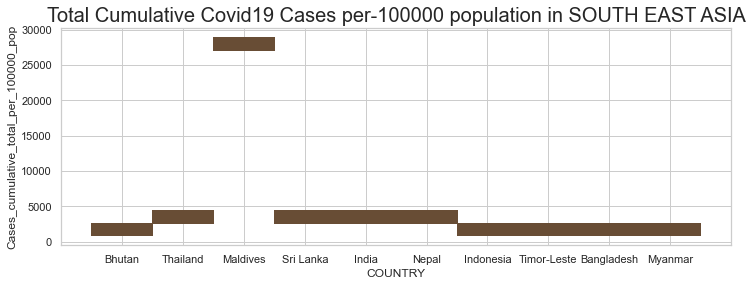

In [50]:
plt.figure(figsize=(12, 4))
plt.title("Total Cumulative Covid19 Cases per-100000 population in SOUTH EAST ASIA",size=20)
sns.histplot(x="COUNTRY", y="Cases_cumulative_total_per_100000_pop", \
    data=dfSouthEastAsia,color='orange')
plt.savefig("SEA_Cases_boxplot",transparent=False, bbox_inches='tight',pad_inches=0.1)
plt.show()

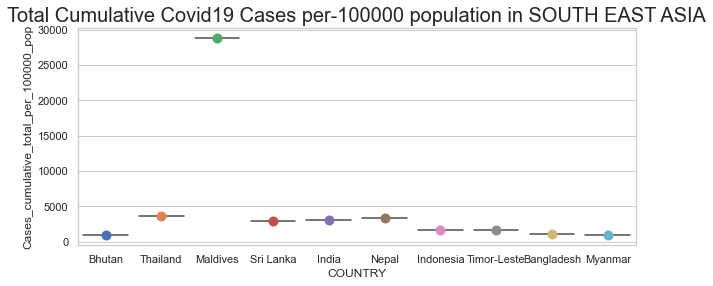

In [51]:
# violin plot with swarm plot
plt.figure(figsize=(10, 4))
plt.title("Total Cumulative Covid19 Cases per-100000 population in SOUTH EAST ASIA",size=20)
sns.violinplot(x="COUNTRY", y="Cases_cumulative_total_per_100000_pop", \
    data=dfSouthEastAsia, inner=None, saturation=0.1)
sns.swarmplot(x="COUNTRY", y="Cases_cumulative_total_per_100000_pop", \
    data=dfSouthEastAsia, size=10)
plt.savefig("SEA_Cases_swarmplot",transparent=False, bbox_inches='tight',pad_inches=0.1)
plt.show()

### Total cumulative Deaths per-100000 population in South east Asia

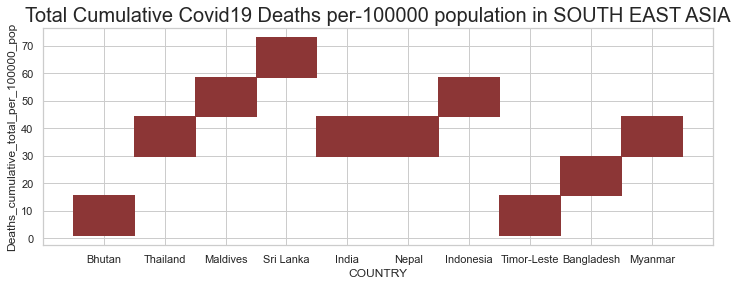

In [52]:
# box plot
plt.figure(figsize=(12, 4))
plt.title("Total Cumulative Covid19 Deaths per-100000 population in SOUTH EAST ASIA",size=20)
sns.histplot(x="COUNTRY", y="Deaths_cumulative_total_per_100000_pop", \
    data=dfSouthEastAsia, color = 'red')
plt.savefig("SEA_Deaths_boxplot",transparent=False, bbox_inches='tight',pad_inches=0.1)
plt.show()

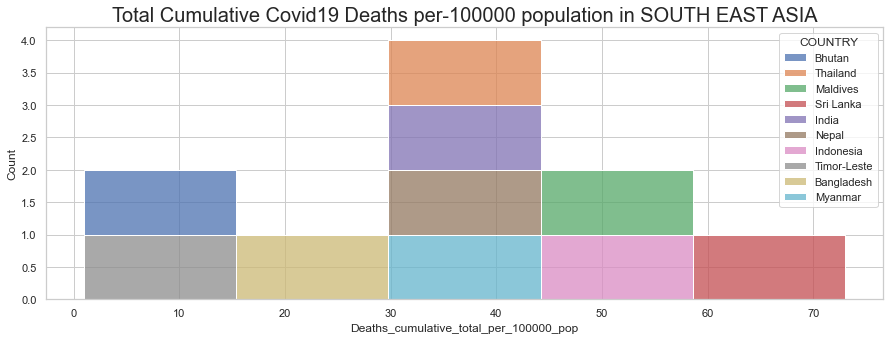

In [53]:
## Stacked histograms and overlapping density plots
plt.figure(figsize=(15, 5))
plt.title("Total Cumulative Covid19 Deaths per-100000 population in SOUTH EAST ASIA",size=20)
sns.histplot(dfSouthEastAsia, x="Deaths_cumulative_total_per_100000_pop", \
    hue="COUNTRY", multiple="stack")

plt.savefig("SEA_Deaths_1",transparent=False, bbox_inches='tight',pad_inches=0.1)
plt.show()

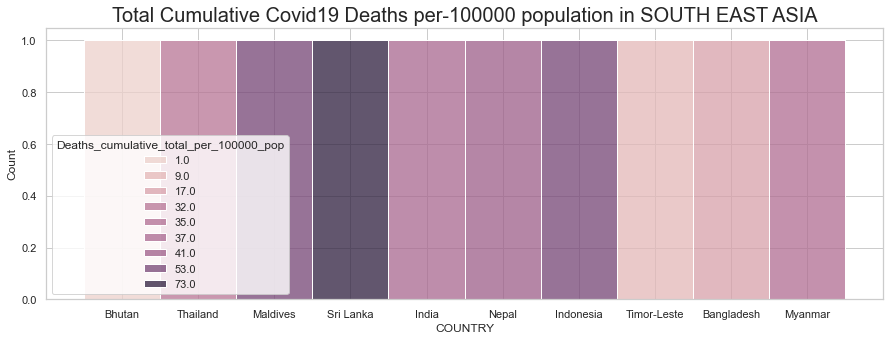

In [54]:
## Stacked histograms and overlapping density plots
plt.figure(figsize=(15, 5))
plt.title("Total Cumulative Covid19 Deaths per-100000 population in SOUTH EAST ASIA",size=20)
sns.histplot(dfSouthEastAsia, x="COUNTRY", \
    hue="Deaths_cumulative_total_per_100000_pop", multiple="stack")

plt.savefig("SEA_Deaths_2",transparent=False, bbox_inches='tight',pad_inches=0.1)
plt.show()

### Comparison between Fully Vaccinated person per-100 population, compared to Cases and Deaths per-100000 population

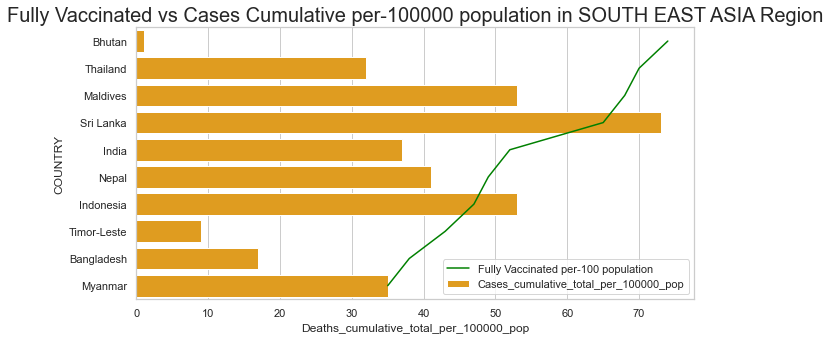

In [55]:
plt.figure(figsize=(10, 5))
plt.title("Fully Vaccinated vs Cases Cumulative per-100000 population in SOUTH EAST ASIA Region", size=20)
sns.lineplot(x="FULLY_VACCINATED_PER100", y="COUNTRY", \
    data=dfSouthEastAsia, color = 'green', label = "Fully Vaccinated per-100 population")
sns.barplot(x="Deaths_cumulative_total_per_100000_pop", y="COUNTRY", \
    data=dfSouthEastAsia, color = 'orange', label = 'Cases_cumulative_total_per_100000_pop')
plt.legend()
plt.savefig("SEA_Vaccinated_Cases_lineplot",transparent=False, bbox_inches='tight',pad_inches=0.1)
plt.show()

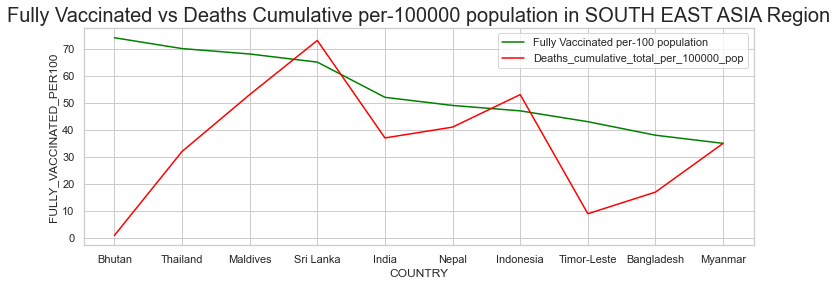

In [56]:
plt.figure(figsize=(12, 4))
plt.title("Fully Vaccinated vs Deaths Cumulative per-100000 population in SOUTH EAST ASIA Region", size=20)
sns.lineplot(x="COUNTRY", y="FULLY_VACCINATED_PER100", \
    data=dfSouthEastAsia, color = 'green',label = "Fully Vaccinated per-100 population")
sns.lineplot(x="COUNTRY", y="Deaths_cumulative_total_per_100000_pop", \
    data=dfSouthEastAsia, color = 'red', label = 'Deaths_cumulative_total_per_100000_pop')
plt.savefig("SEA_Vaccinated_Deaths_lineplot",transparent=False, bbox_inches='tight',pad_inches=0.1)
plt.show()

In [57]:
dfEurope.head(3)

,COUNTRY,Region,Cases_cumulative_total_per_100000_pop,Deaths_cumulative_total_per_100000_pop,FULLY_VACCINATED_PER100
173,Gibraltar,Europe,42053.0,300.0,121.0
158,Faroe Islands,Europe,55254.0,45.0,84.0
129,Malta,Europe,13535.0,112.0,84.0


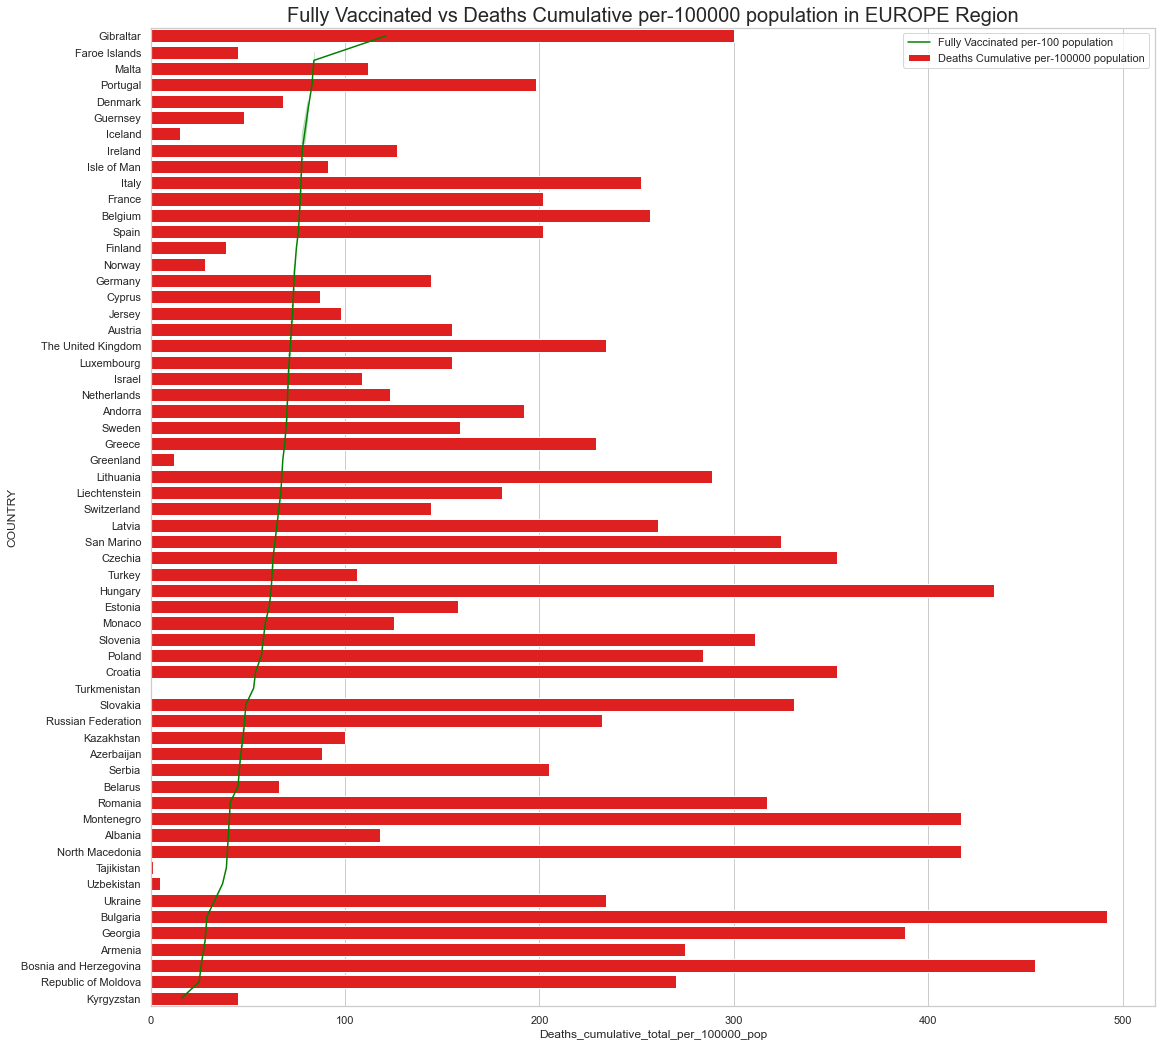

In [58]:
plt.figure(figsize=(18, 18))
plt.title("Fully Vaccinated vs Deaths Cumulative per-100000 population in EUROPE Region", size=20)
sns.lineplot(x="FULLY_VACCINATED_PER100", y="COUNTRY", \
    data=dfEurope, color = 'green', label = "Fully Vaccinated per-100 population")
sns.barplot(x="Deaths_cumulative_total_per_100000_pop", y="COUNTRY", \
    data=dfEurope, color = 'red', label = 'Deaths Cumulative per-100000 population')
plt.legend()
plt.savefig("EUROPE_Vaccinated_Deaths_lineplot",transparent=False, bbox_inches='tight',pad_inches=0.1)
plt.show()

In [59]:
dfAmericas.head(4)

,COUNTRY,Region,Cases_cumulative_total_per_100000_pop,Deaths_cumulative_total_per_100000_pop,FULLY_VACCINATED_PER100
31,Chile,Americas,13100.0,211.0,89.0
80,Puerto Rico,Americas,16320.0,140.0,89.0
170,Cayman Islands,Americas,24245.0,24.0,88.0
50,Cuba,Americas,9339.0,75.0,87.0


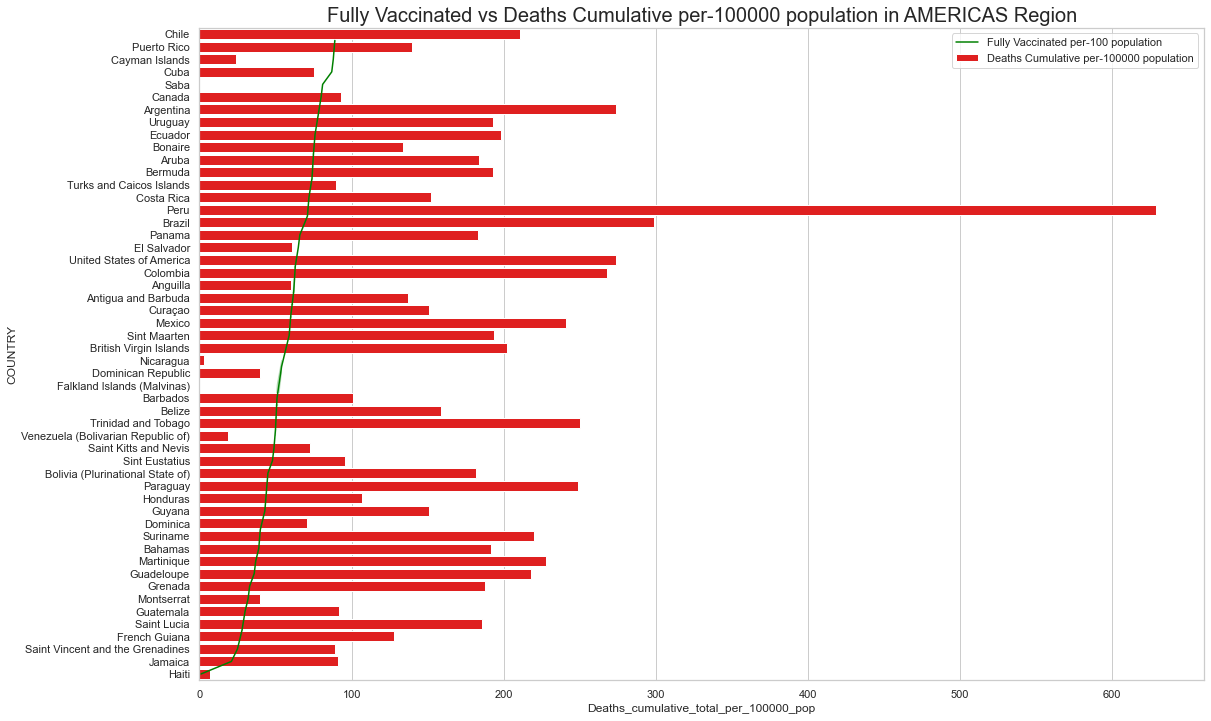

In [60]:
plt.figure(figsize=(18, 12))
plt.title("Fully Vaccinated vs Deaths Cumulative per-100000 population in AMERICAS Region", size=20)
sns.lineplot(x="FULLY_VACCINATED_PER100", y="COUNTRY", \
    data=dfAmericas, color = 'green', label = "Fully Vaccinated per-100 population")
sns.barplot(x="Deaths_cumulative_total_per_100000_pop", y="COUNTRY", \
    data=dfAmericas, color = 'red', label = 'Deaths Cumulative per-100000 population')
plt.legend()
plt.savefig("AMERICAS_Vaccinated_Deaths_lineplot",transparent=False, bbox_inches='tight',pad_inches=0.1)
plt.show()

In [61]:
dfAfrica.tail(11)

,COUNTRY,Region,Cases_cumulative_total_per_100000_pop,Deaths_cumulative_total_per_100000_pop,FULLY_VACCINATED_PER100
187,Niger,Africa,36.0,1.0,4.0
165,Burkina Faso,Africa,99.0,2.0,4.0
151,United Republic of Tanzania,Africa,56.0,1.0,3.0
133,Madagascar,Africa,222.0,5.0,3.0
98,Nigeria,Africa,123.0,2.0,3.0
156,Mali,Africa,149.0,4.0,3.0
116,Cameroon,Africa,447.0,7.0,2.0
169,South Sudan,Africa,151.0,1.0,2.0
194,Chad,Africa,44.0,1.0,1.0
145,Burundi,Africa,318.0,0.0,0.0


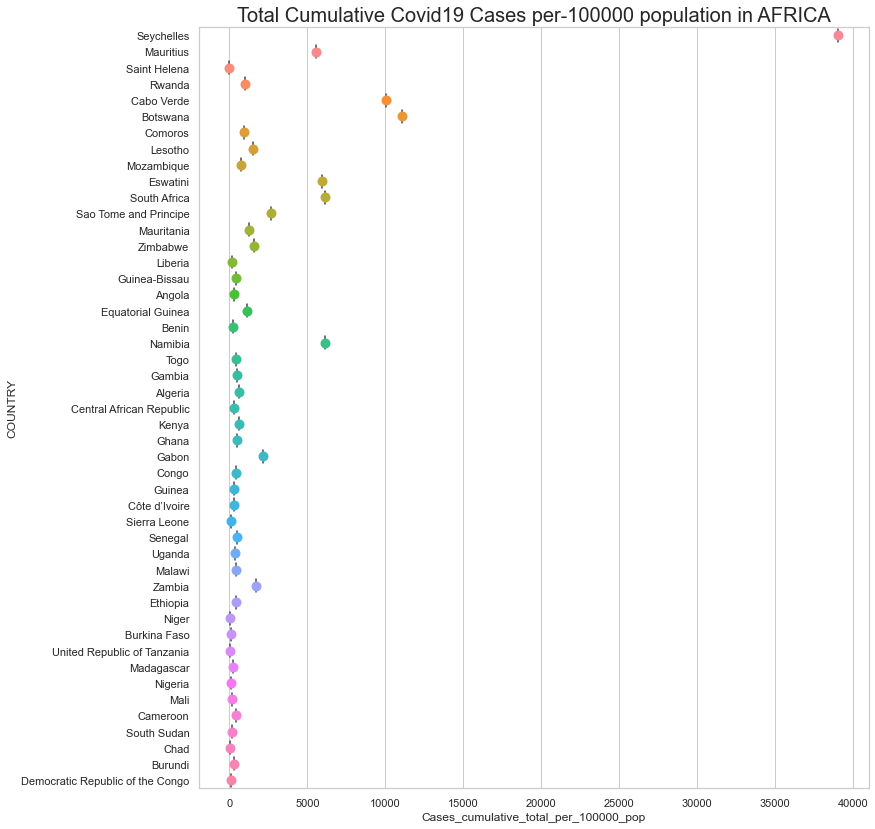

In [62]:
# violin plot with swarm plot
plt.figure(figsize=(12, 14))
plt.title("Total Cumulative Covid19 Cases per-100000 population in AFRICA",size=20)
sns.violinplot(x="Cases_cumulative_total_per_100000_pop", y="COUNTRY", \
    data=dfAfrica, inner=None, saturation=0.1)
sns.swarmplot(x="Cases_cumulative_total_per_100000_pop", y="COUNTRY", \
    data=dfAfrica, size=10)
plt.savefig("Africa_swarmplot",transparent=False, bbox_inches='tight',pad_inches=0.1)
plt.show()

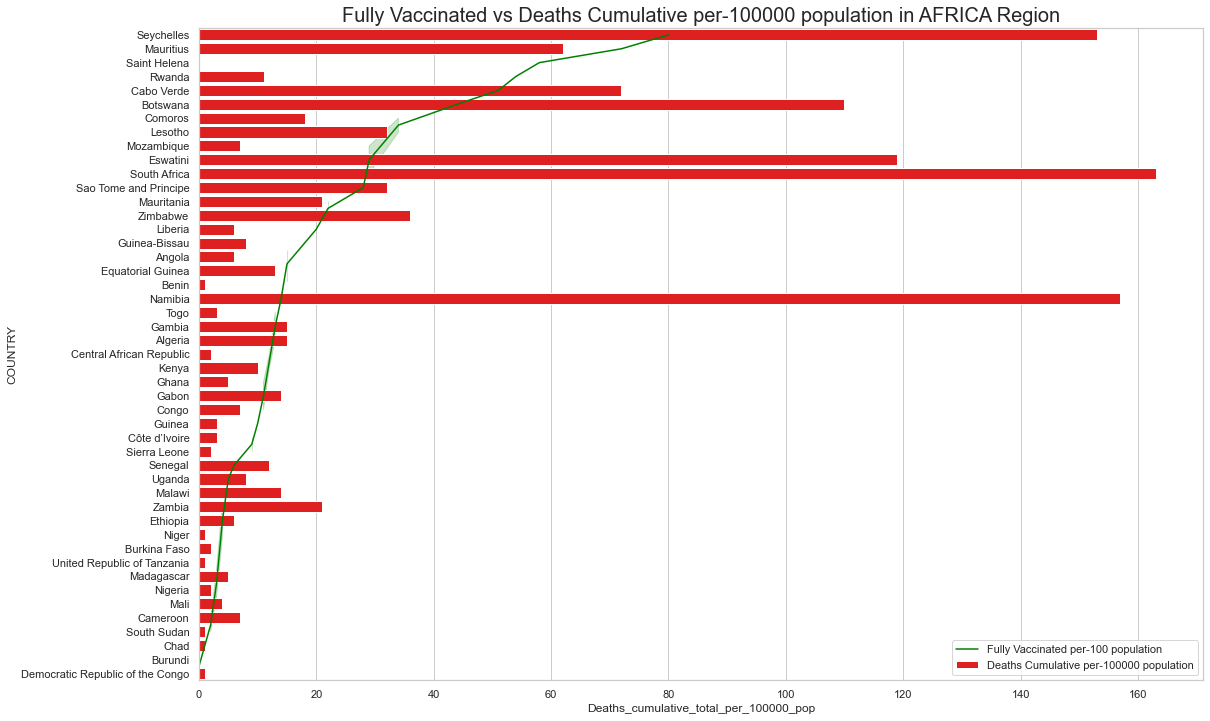

In [63]:
plt.figure(figsize=(18, 12))
plt.title("Fully Vaccinated vs Deaths Cumulative per-100000 population in AFRICA Region", size=20)
sns.lineplot(x="FULLY_VACCINATED_PER100", y="COUNTRY", \
    data=dfAfrica, color = 'green', label = "Fully Vaccinated per-100 population")
sns.barplot(x="Deaths_cumulative_total_per_100000_pop", y="COUNTRY", \
    data=dfAfrica, color = 'red', label = 'Deaths Cumulative per-100000 population')
plt.legend()
plt.savefig("AFRIKA_Vaccinated_Deaths_lineplot",transparent=False, bbox_inches='tight',pad_inches=0.1)
plt.show()

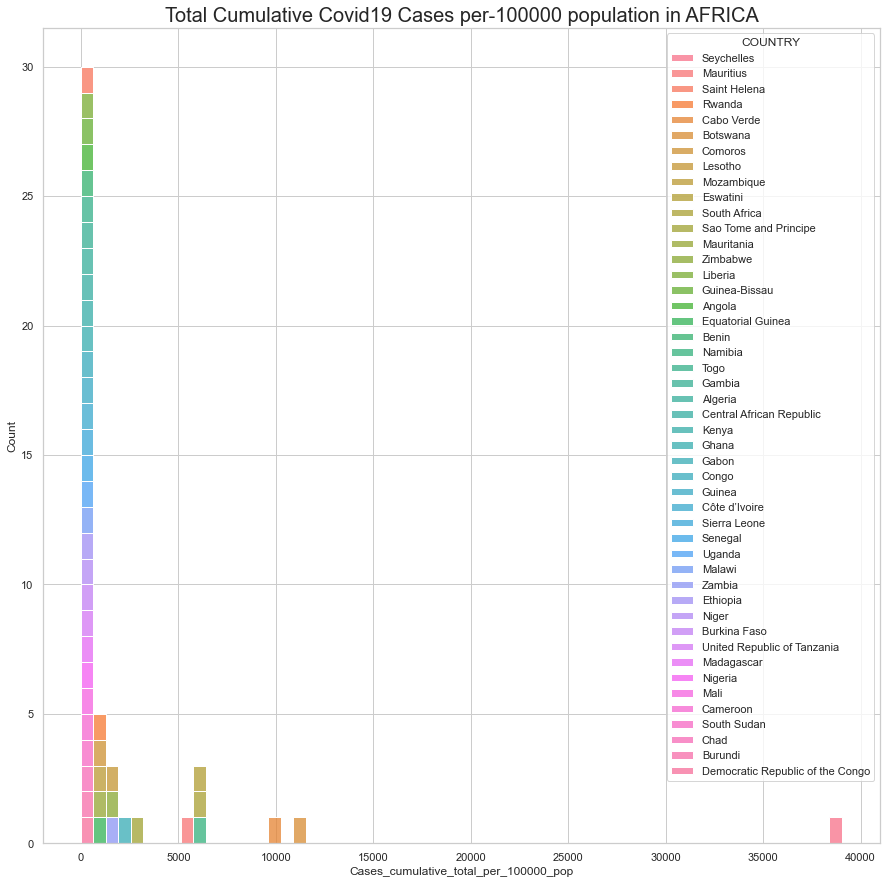

In [64]:
## Stacked histograms and overlapping density plots
plt.figure(figsize=(15, 15))
plt.title("Total Cumulative Covid19 Cases per-100000 population in AFRICA",size=20)
sns.histplot(dfAfrica, x="Cases_cumulative_total_per_100000_pop", \
    hue="COUNTRY", multiple="stack")
plt.savefig("AFRICA_Cases_2",transparent=False, bbox_inches='tight',pad_inches=0.1)
plt.show()

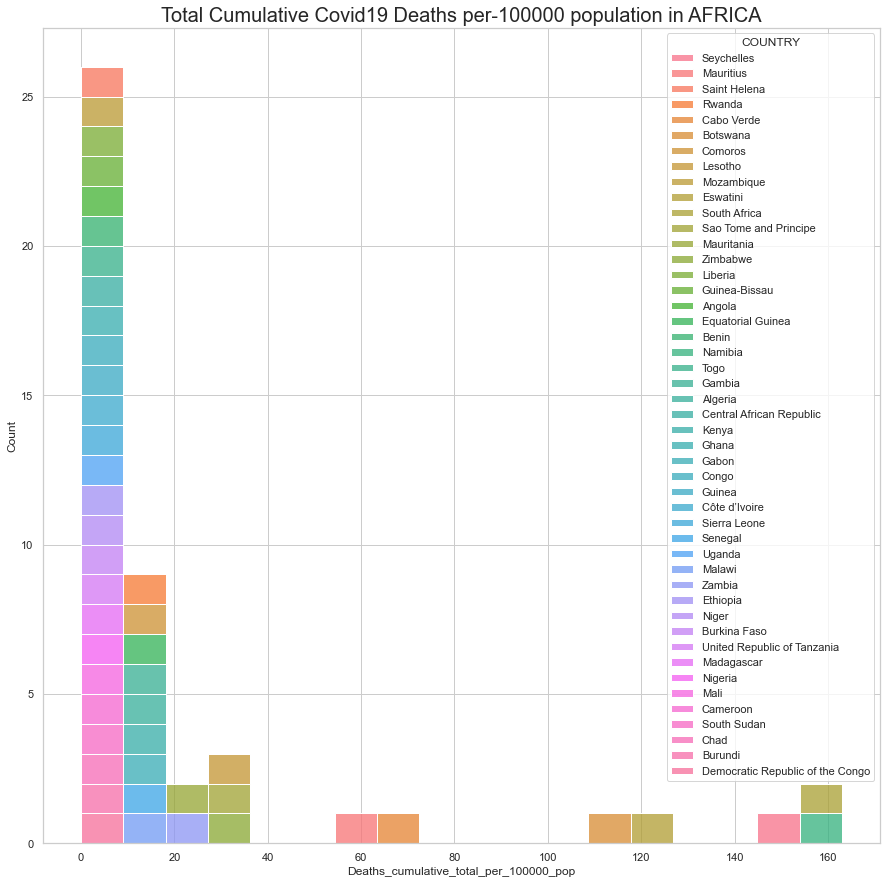

In [65]:
plt.figure(figsize=(15, 15))
plt.title("Total Cumulative Covid19 Deaths per-100000 population in AFRICA",size=20)
sns.histplot(dfAfrica, x="Deaths_cumulative_total_per_100000_pop", \
    hue="COUNTRY", multiple="stack")
plt.savefig("AFRICA_Death_1",transparent=False, bbox_inches='tight',pad_inches=0.1)
plt.show()

In [66]:
dfEasternMediterranean.head(3)

,COUNTRY,Region,Cases_cumulative_total_per_100000_pop,Deaths_cumulative_total_per_100000_pop,FULLY_VACCINATED_PER100
59,United Arab Emirates,Eastern Mediterranean,8737.0,23.0,94.0
90,Qatar,Eastern Mediterranean,12111.0,23.0,77.0
72,Kuwait,Eastern Mediterranean,13907.0,59.0,76.0


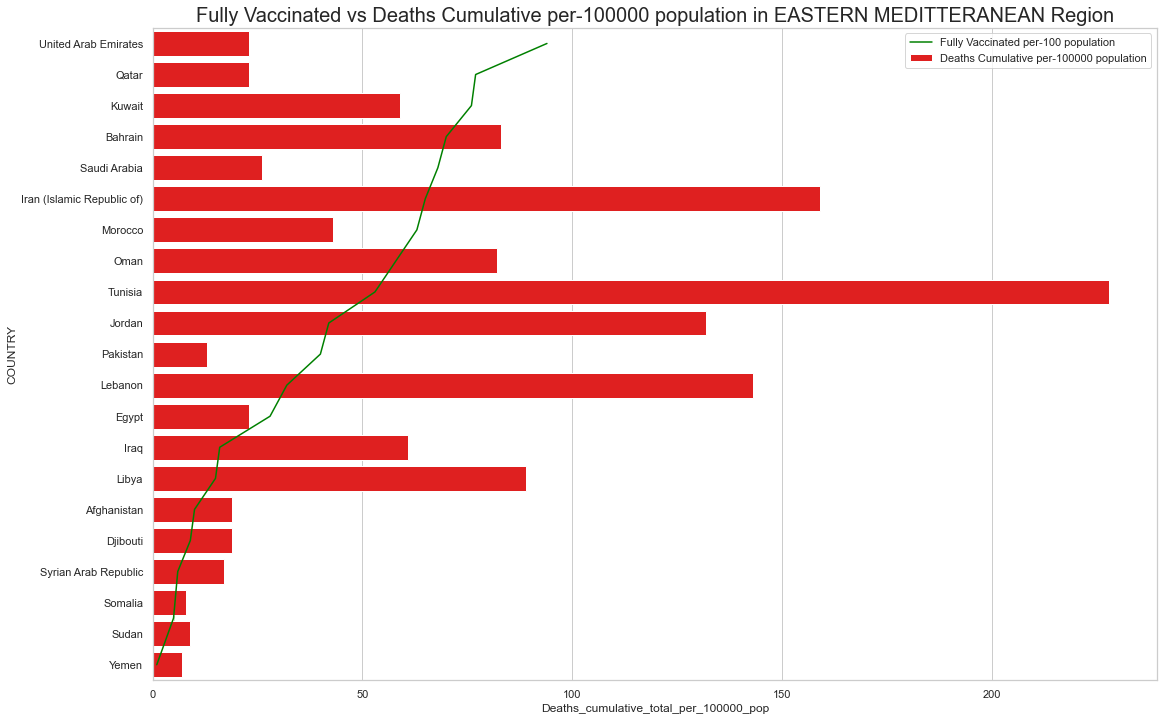

In [67]:
plt.figure(figsize=(18, 12))
plt.title("Fully Vaccinated vs Deaths Cumulative per-100000 population in EASTERN MEDITTERANEAN Region", size=20)
sns.lineplot(x="FULLY_VACCINATED_PER100", y="COUNTRY", \
    data=dfEasternMediterranean, color = 'green',label = "Fully Vaccinated per-100 population")
sns.barplot(x="Deaths_cumulative_total_per_100000_pop", y="COUNTRY", \
    data=dfEasternMediterranean, color = 'red', label = 'Deaths Cumulative per-100000 population')
plt.legend()
plt.savefig("EASTMED_Vaccinated_Deaths_lineplot",transparent=False, bbox_inches='tight',pad_inches=0.1)
plt.show()

In [68]:
dfWesternPacific.head(3)

,COUNTRY,Region,Cases_cumulative_total_per_100000_pop,Deaths_cumulative_total_per_100000_pop,FULLY_VACCINATED_PER100
203,Palau,Western Pacific,16831.0,0.0,94.0
166,Brunei Darussalam,Western Pacific,4451.0,13.0,92.0
46,Republic of Korea,Western Pacific,2417.0,14.0,86.0


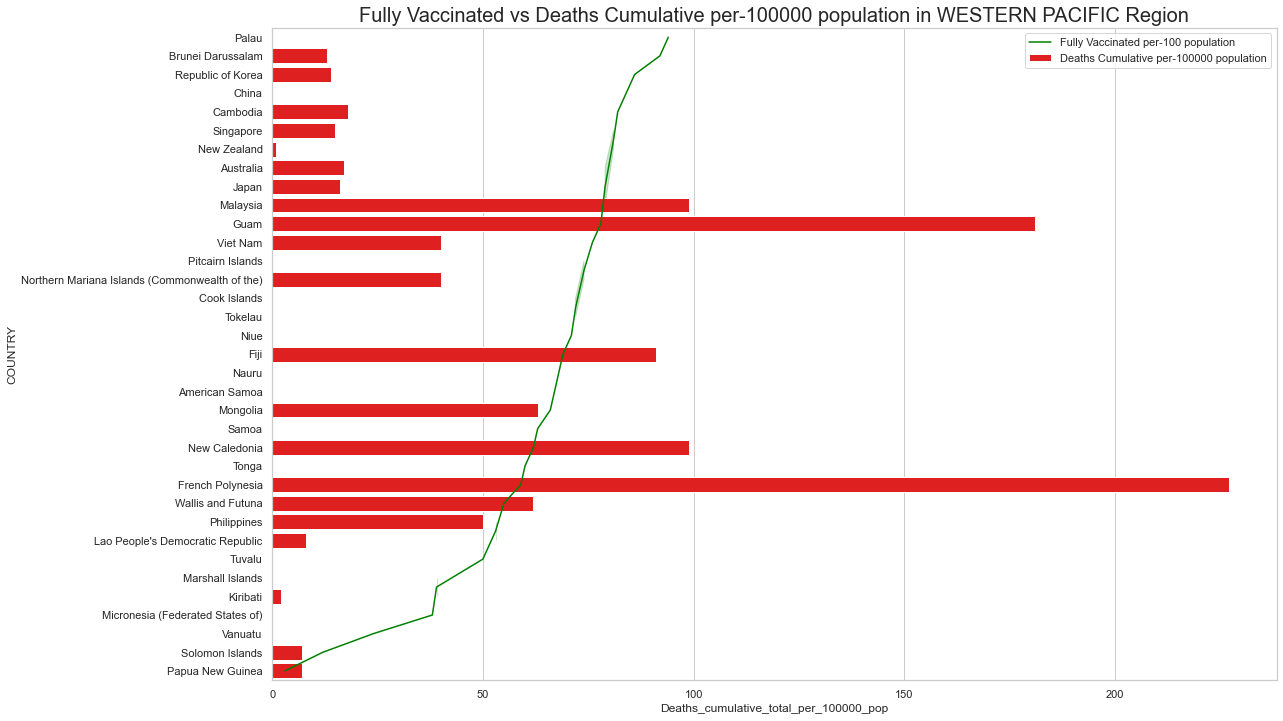

In [69]:
plt.figure(figsize=(18, 12))
plt.title("Fully Vaccinated vs Deaths Cumulative per-100000 population in WESTERN PACIFIC Region", size=20)
sns.lineplot(x="FULLY_VACCINATED_PER100", y="COUNTRY", \
    data=dfWesternPacific, color = 'green',label = "Fully Vaccinated per-100 population")
sns.barplot(x="Deaths_cumulative_total_per_100000_pop", y="COUNTRY", \
    data=dfWesternPacific, color = 'red', label = 'Deaths Cumulative per-100000 population')
plt.legend()
plt.savefig("WESTPAC_Vaccinated_Deaths_lineplot",transparent=False, bbox_inches='tight',pad_inches=0.1)
plt.show()

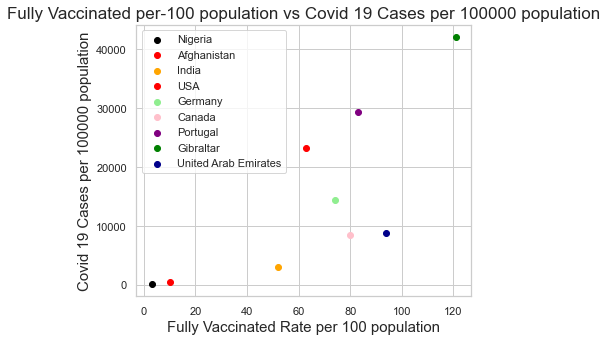

In [84]:
#create eight different dataframes: dfa, dfb, dfc,dfd,dfe,dff,dfg,dfh and then plot
dfa = df[df['COUNTRY']=="Nigeria"]
dfb = df[df['COUNTRY']=="Afghanistan"]
dfc = df[df['COUNTRY']=="India"]
dfd = df[df['COUNTRY']=="United States of America"]
dfe = df[df['COUNTRY']=="Germany"]
dff = df[df['COUNTRY']=="Canada"]
dfg = df[df['COUNTRY']=="Portugal"]
dfh = df[df['COUNTRY']=="Gibraltar"]
dfi = df[df['COUNTRY']=="United Arab Emirates"]

#plot the three dataframes
plt.rcParams["figure.figsize"] = [6,5]
plt.scatter(dfa['FULLY_VACCINATED_PER100'], dfa['Cases_cumulative_total_per_100000_pop'], color='black',label='Nigeria')
plt.scatter(dfb['FULLY_VACCINATED_PER100'], dfb['Cases_cumulative_total_per_100000_pop'], color='red',label='Afghanistan')
plt.scatter(dfc['FULLY_VACCINATED_PER100'], dfc['Cases_cumulative_total_per_100000_pop'], color='orange',label='India')
plt.scatter(dfd['FULLY_VACCINATED_PER100'], dfd['Cases_cumulative_total_per_100000_pop'], color='red',label='USA')
plt.scatter(dfe['FULLY_VACCINATED_PER100'], dfe['Cases_cumulative_total_per_100000_pop'], color='lightgreen',label='Germany')
plt.scatter(dff['FULLY_VACCINATED_PER100'], dff['Cases_cumulative_total_per_100000_pop'], color='pink',label='Canada')
plt.scatter(dfg['FULLY_VACCINATED_PER100'], dfg['Cases_cumulative_total_per_100000_pop'], color='purple',label='Portugal')
plt.scatter(dfh['FULLY_VACCINATED_PER100'], dfh['Cases_cumulative_total_per_100000_pop'], color='green',label='Gibraltar')
plt.scatter(dfi['FULLY_VACCINATED_PER100'], dfi['Cases_cumulative_total_per_100000_pop'], 
            color='darkblue',label='United Arab Emirates')

#put label
plt.title("Fully Vaccinated per-100 population vs Covid 19 Cases per 100000 population", size = 17)
plt.xlabel("Fully Vaccinated Rate per 100 population", size =15)
plt.ylabel("Covid 19 Cases per 100000 population", size =15)
#plt.plot(df.FULLY_VACCINATED_PER100, df.COUNTRY, label = 'Fully Vaccinated' ,color='green')
plt.legend()

plt.savefig("Country_Vaccine_Cases",transparent=False, bbox_inches='tight',pad_inches=0.1)

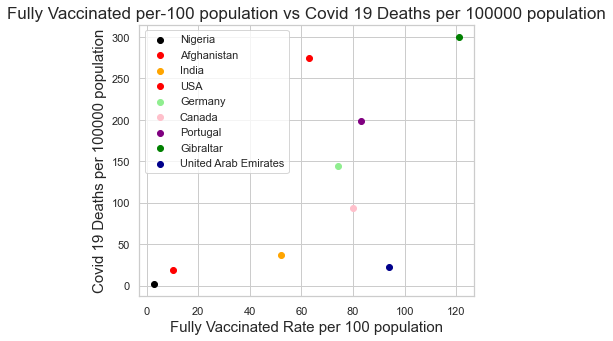

In [81]:
#create eight different dataframes: dfa, dfb, dfc,dfd,dfe,dff,dfg,dfh and then plot
dfa = df[df['COUNTRY']=="Nigeria"]
dfb = df[df['COUNTRY']=="Afghanistan"]
dfc = df[df['COUNTRY']=="India"]
dfd = df[df['COUNTRY']=="United States of America"]
dfe = df[df['COUNTRY']=="Germany"]
dff = df[df['COUNTRY']=="Canada"]
dfg = df[df['COUNTRY']=="Portugal"]
dfh = df[df['COUNTRY']=="Gibraltar"]
dfi = df[df['COUNTRY']=="United Arab Emirates"]

#plot the three dataframes
plt.rcParams["figure.figsize"] = [6,5]
plt.scatter(dfa['FULLY_VACCINATED_PER100'], dfa['Deaths_cumulative_total_per_100000_pop'], color='black',label='Nigeria')
plt.scatter(dfb['FULLY_VACCINATED_PER100'], dfb['Deaths_cumulative_total_per_100000_pop'], color='red',label='Afghanistan')
plt.scatter(dfc['FULLY_VACCINATED_PER100'], dfc['Deaths_cumulative_total_per_100000_pop'], color='orange',label='India')
plt.scatter(dfd['FULLY_VACCINATED_PER100'], dfd['Deaths_cumulative_total_per_100000_pop'], color='red',label='USA')
plt.scatter(dfe['FULLY_VACCINATED_PER100'], dfe['Deaths_cumulative_total_per_100000_pop'], color='lightgreen',label='Germany')
plt.scatter(dff['FULLY_VACCINATED_PER100'], dff['Deaths_cumulative_total_per_100000_pop'], color='pink',label='Canada')
plt.scatter(dfg['FULLY_VACCINATED_PER100'], dfg['Deaths_cumulative_total_per_100000_pop'], color='purple',label='Portugal')
plt.scatter(dfh['FULLY_VACCINATED_PER100'], dfh['Deaths_cumulative_total_per_100000_pop'], color='green',label='Gibraltar')
plt.scatter(dfi['FULLY_VACCINATED_PER100'], dfi['Deaths_cumulative_total_per_100000_pop'], 
            color='darkblue',label='United Arab Emirates')

#put label
plt.title("Fully Vaccinated per-100 population vs Covid 19 Deaths per 100000 population", size = 17)
plt.xlabel("Fully Vaccinated Rate per 100 population", size =15)
plt.ylabel("Covid 19 Deaths per 100000 population", size =15)
#plt.plot(df.FULLY_VACCINATED_PER100, df.COUNTRY, label = 'Fully Vaccinated' ,color='green')
plt.legend()

plt.savefig("Country_Vaccine_Deaths",transparent=False, bbox_inches='tight',pad_inches=0.1)

In [71]:
#Observing data in Specific Location
dfNigeria = df[df['COUNTRY'] == 'Nigeria']
dfNigeria.head()

,COUNTRY,Region,Cases_cumulative_total_per_100000_pop,Deaths_cumulative_total_per_100000_pop,FULLY_VACCINATED_PER100
98,Nigeria,Africa,123.0,2.0,3.0


In [74]:
#Observing data in Specific Location
dfGibraltar = df[df['COUNTRY'] == 'Gibraltar']
dfGibraltar.head()

,COUNTRY,Region,Cases_cumulative_total_per_100000_pop,Deaths_cumulative_total_per_100000_pop,FULLY_VACCINATED_PER100
173,Gibraltar,Europe,42053.0,300.0,121.0


In [77]:
#Observing data in Specific Location
dfBulgaria = df[df['COUNTRY'] == 'Bulgaria']
dfBulgaria.head()

,COUNTRY,Region,Cases_cumulative_total_per_100000_pop,Deaths_cumulative_total_per_100000_pop,FULLY_VACCINATED_PER100
51,Bulgaria,Europe,14747.0,492.0,29.0


In [72]:
dfUSA = df[df['COUNTRY'] == 'United States of America']
dfUSA.head()

,COUNTRY,Region,Cases_cumulative_total_per_100000_pop,Deaths_cumulative_total_per_100000_pop,FULLY_VACCINATED_PER100
0,United States of America,Americas,23157.0,274.0,63.0


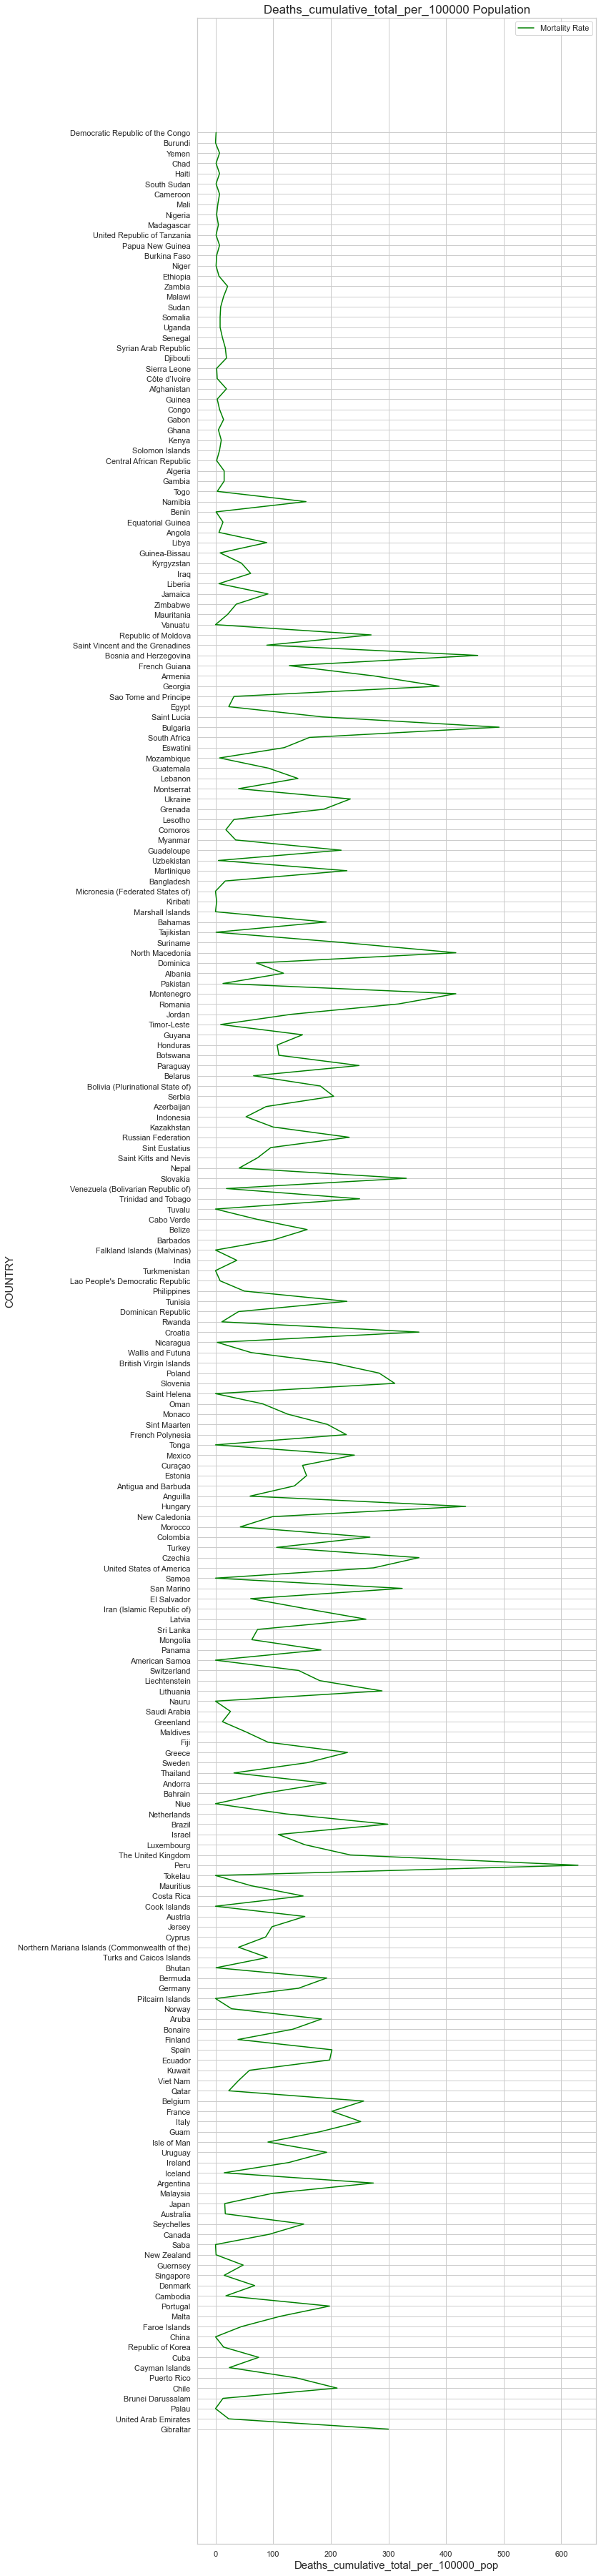

In [75]:
plt.title("Deaths_cumulative_total_per_100000 Population", size = 17)
plt.xlabel("Deaths_cumulative_total_per_100000_pop", size =15)
plt.ylabel("COUNTRY", size =15)
plt.grid("True")
plt.rcParams["figure.figsize"] = [10,65]

plt.plot(df.Deaths_cumulative_total_per_100000_pop, df.COUNTRY, label = 'Mortality Rate' ,color='green')

plt.legend()
plt.savefig("AllCountries_Vaccine_Cases",transparent=False, bbox_inches='tight',pad_inches=0.1)